In [31]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [32]:
# dataset = 'https://docs.google.com/spreadsheets/d/18eR6DBe5TMWU9FnIewaGtsepDbV4BOyr/edit?rtpof=true&sd=true#gid=462557918'
# download the dataset and stored in Github repositary

In [33]:
## Read the dataset from local using pandas

#df = pd.read_excel(r"Copper_Set.xlsx")

#df = pd.read_csv(r"C:\Users\Mouli\Downloads\Industrial-Copper-Modeling\Copper_Set.csv")

## Read the dataset from Github repositary using pandas

df = pd.read_csv("https://raw.githubusercontent.com/MouliBai/Industrial-Copper-Modeling/main/Copper_Set.csv")

In [34]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [35]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [36]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['item_date_1'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['delivery date_1'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df.dtypes

id                  object
item_date          float64
quantity tons      float64
customer           float64
country            float64
status              object
item type           object
application        float64
thickness          float64
width              float64
material_ref        object
product_ref          int64
delivery date      float64
selling_price      float64
item_date_1         object
delivery date_1     object
dtype: object

In [37]:
# verify the number of unique values in each features

for i in list(df.columns):
    print(f"{i}:{df[i].nunique()}")

id:181671
item_date:252
quantity tons:181672
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16563
product_ref:33
delivery date:28
selling_price:9795
item_date_1:250
delivery date_1:26


In [38]:
# check any null values in data
df.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery date_1        3
dtype: int64

In [39]:
# Some rubbish values are present in ‘Material_ref’ which starts with ‘00000’ value which should be converted into null

df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01


In [40]:
df.isnull().sum()

id                      2
item_date               1
quantity tons           1
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
material_ref       100645
product_ref             0
delivery date           1
selling_price           1
item_date_1             3
delivery date_1         3
dtype: int64

In [41]:
# material ref have more than 55% are null values and id have all are unique values. so we have drop both columns.

df.drop(columns=['id','material_ref'], inplace=True)
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [42]:
# check null values for all features
df.isnull().sum()

item_date           1
quantity tons       1
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       1
item_date_1         3
delivery date_1     3
dtype: int64

In [43]:
# Handling null values using median and mode
# median - middle value in dataset (asc/desc), mode - value that appears most frequently in dataset

# object datatype using mode
df['item_date'].fillna(df['item_date'].mode().iloc[0], inplace=True)
df['item_date_1'].fillna(df['item_date_1'].mode().iloc[0], inplace=True)
df['status'].fillna(df['status'].mode().iloc[0], inplace=True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0], inplace=True)
df['delivery date_1'].fillna(df['delivery date_1'].mode().iloc[0], inplace=True)

#numerical datatype using median
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
df['customer'].fillna(df['customer'].median(), inplace=True)
df['country'].fillna(df['country'].median(), inplace=True)
df['application'].fillna(df['application'].median(), inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

In [44]:
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery date_1    0
dtype: int64

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874894e+03,2.349075e+06,-2000.00,1.097037e+01,3.036464e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181673.0,2.561441e+01,1.775342e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181673.0,2.020738e+07,2.411052e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181673.0,1.918029e+03,3.317947e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [46]:
# quantity and selling price values are not below 0. so we convert to null for below 0 values.

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181669.0,5.875034e+03,2.349101e+06,1.000000e-05,1.097139e+01,3.036500e+01,6.716130e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181673.0,2.020738e+07,2.411052e+04,2.019040e+07,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181666.0,1.918118e+03,3.318011e+05,1.000000e-01,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [47]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [48]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [49]:
# convert categorical data into numerical data - using map and ordinal encoder methods

df['status'] = df['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,NaN,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [50]:
# array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)
df['item type'].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [51]:
# final verification of null values after encoding
df.isnull().sum()

item_date          0
quantity tons      4
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      7
item_date_1        0
delivery date_1    0
dtype: int64

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181669.0,5.875034e+03,2.349101e+06,1.000000e-05,1.097139e+01,3.036500e+01,6.716130e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [53]:
# find outliers - box plot & skewed data - hist plot and violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

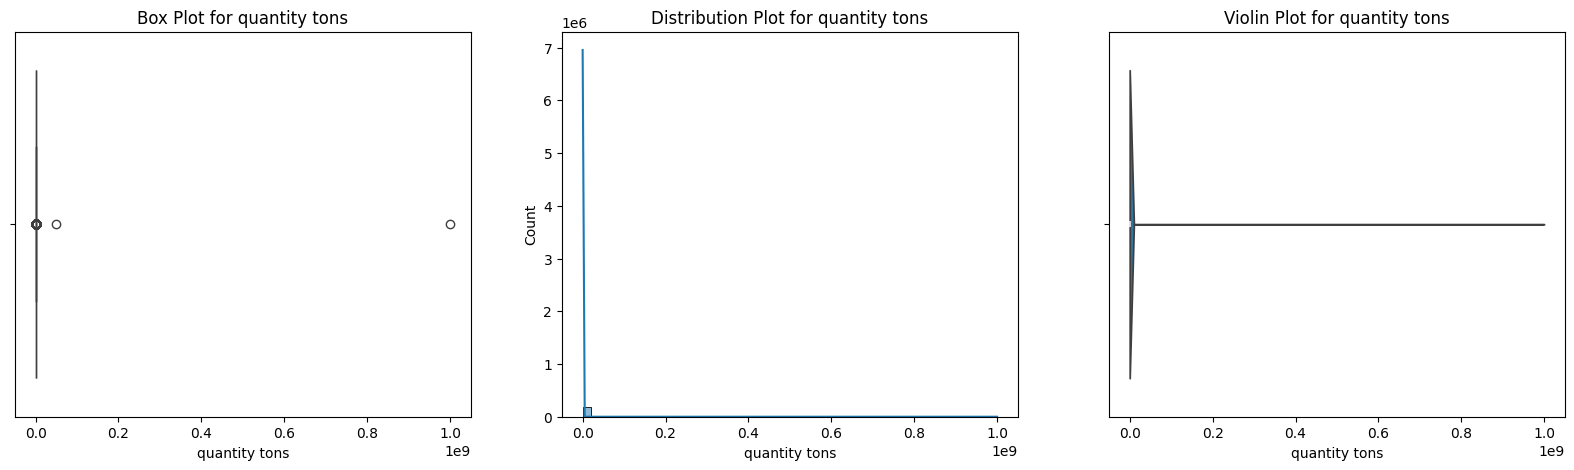

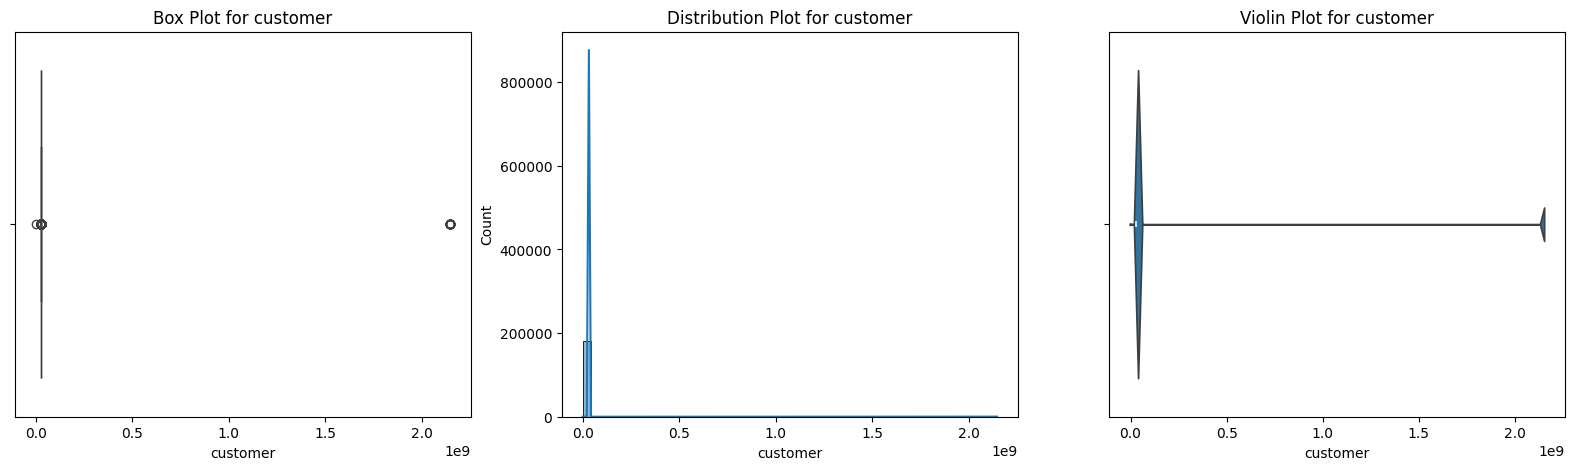

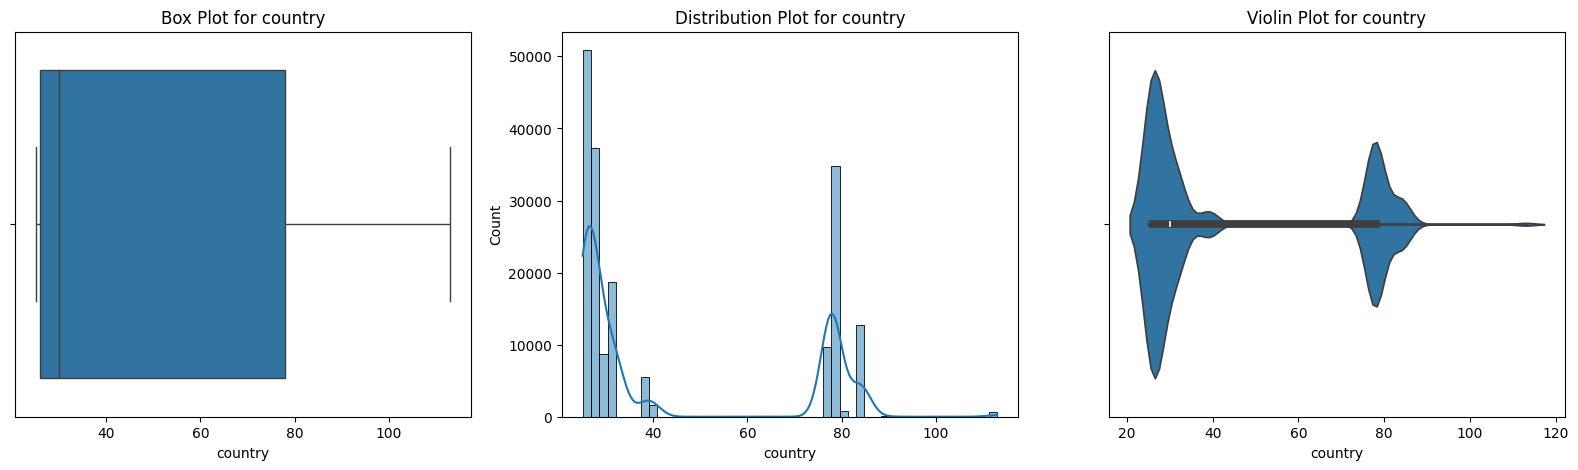

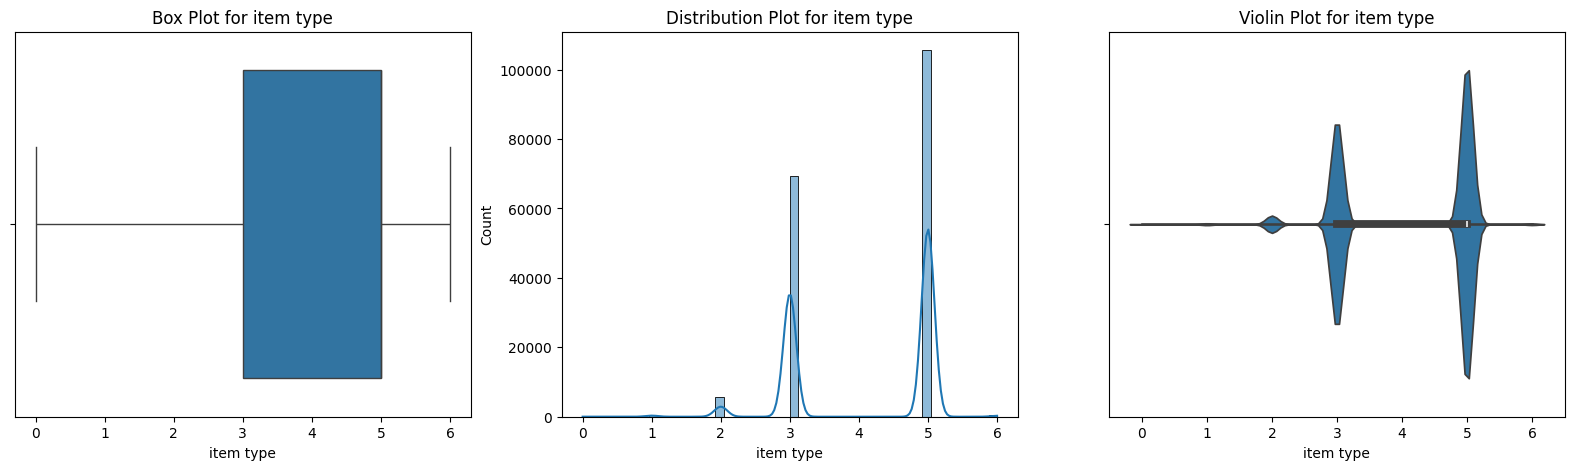

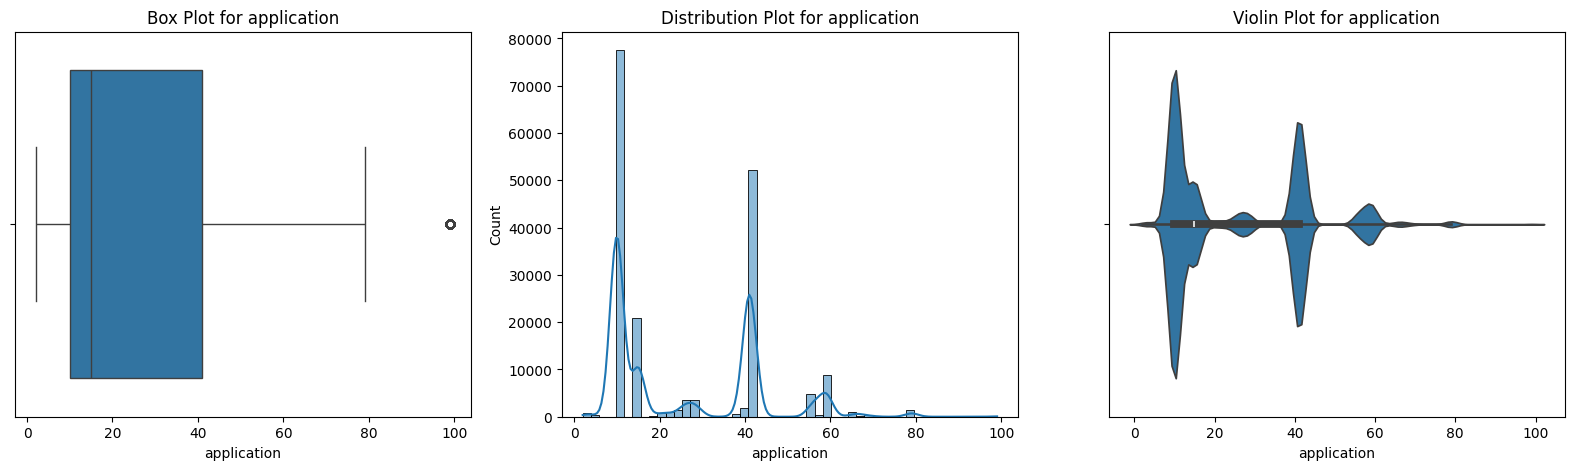

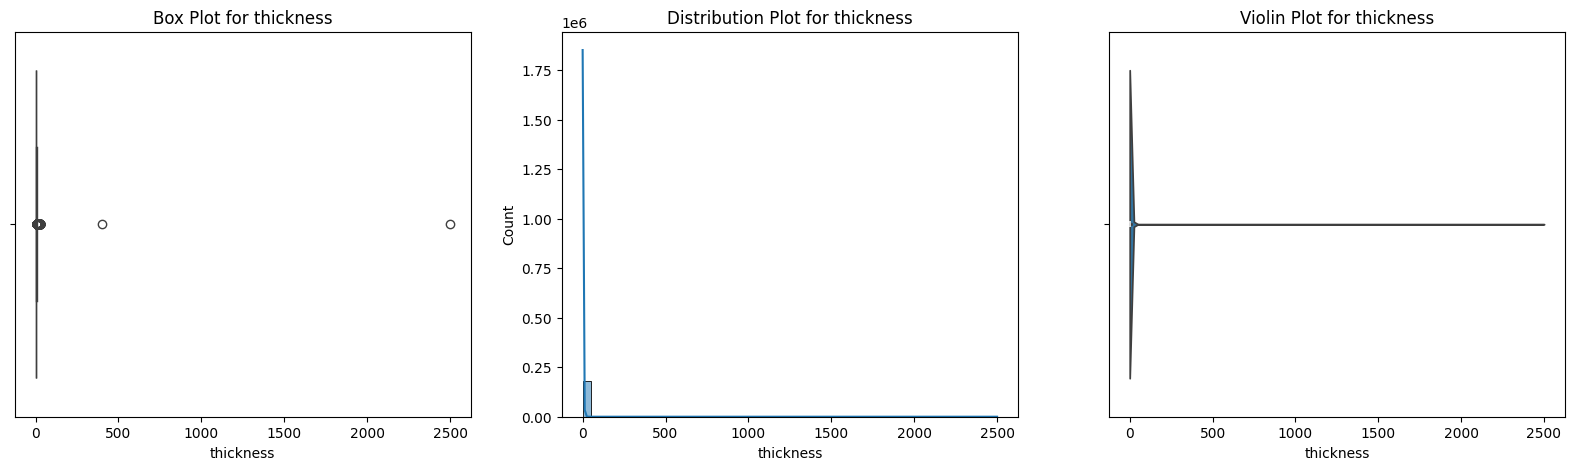

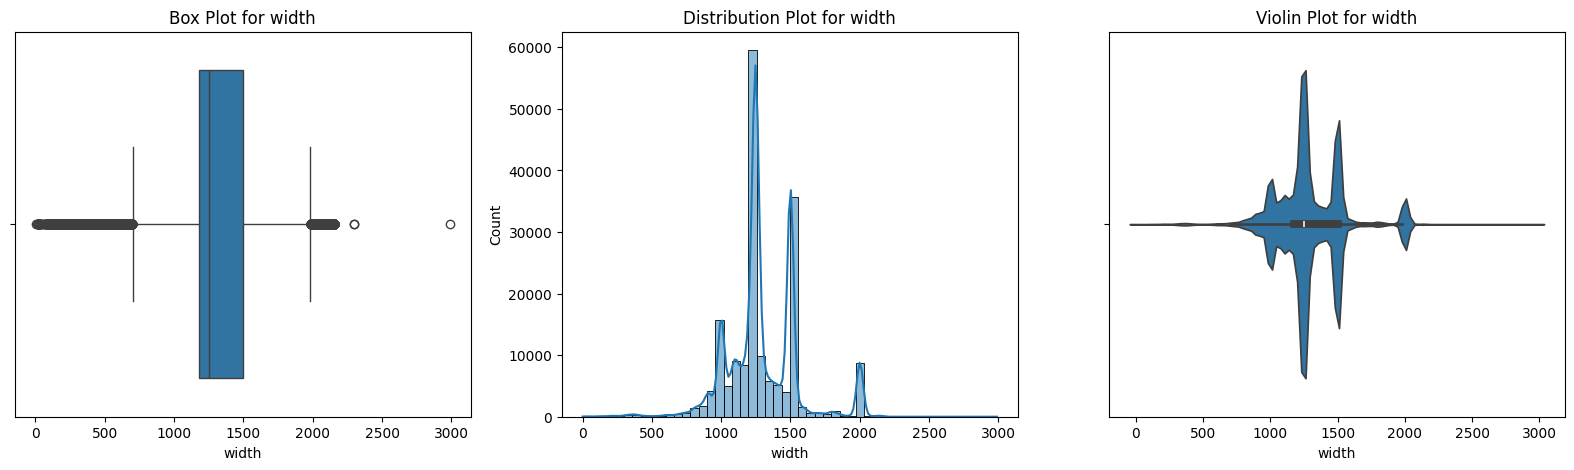

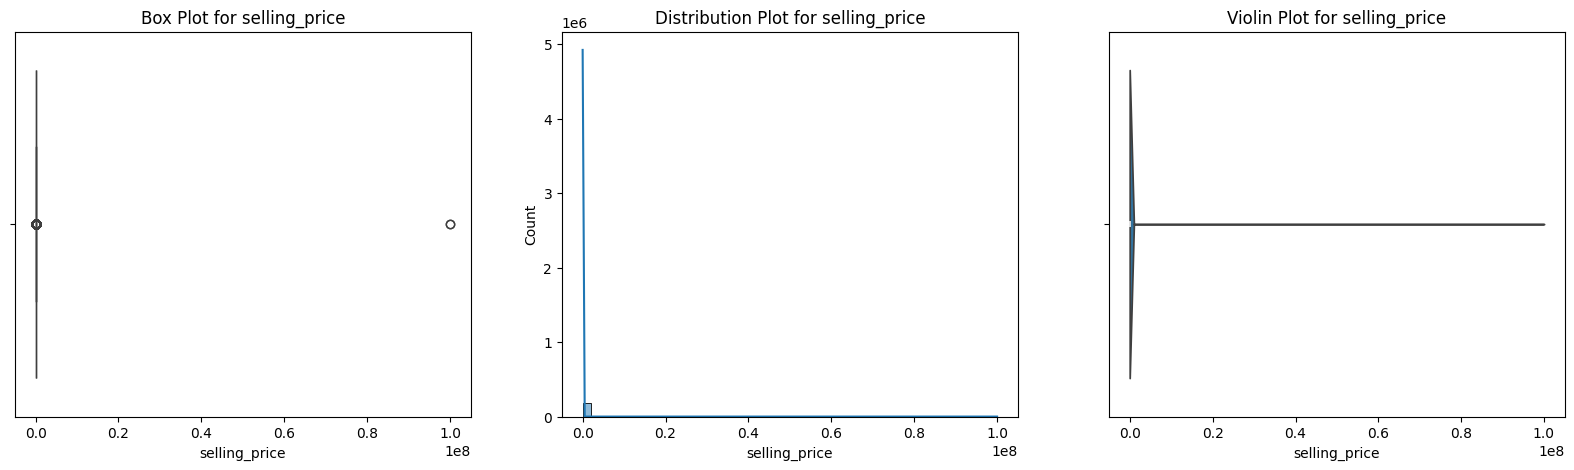

In [54]:
for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [55]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data

df1 = df.copy()
df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,NaN,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,NaN,-0.162519,6.398595


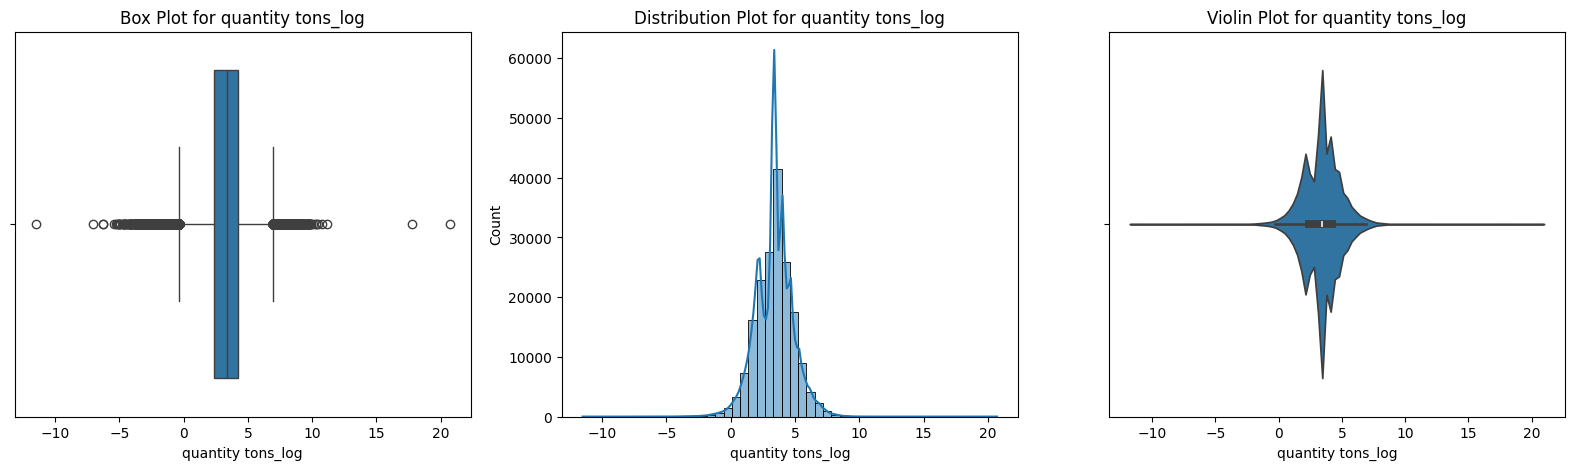

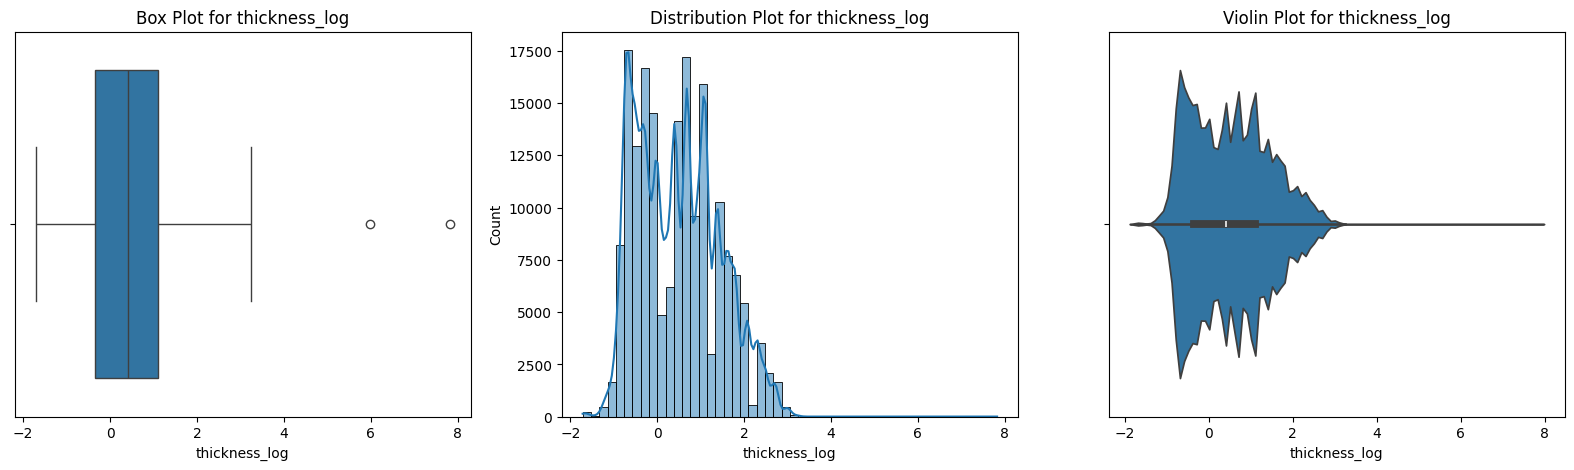

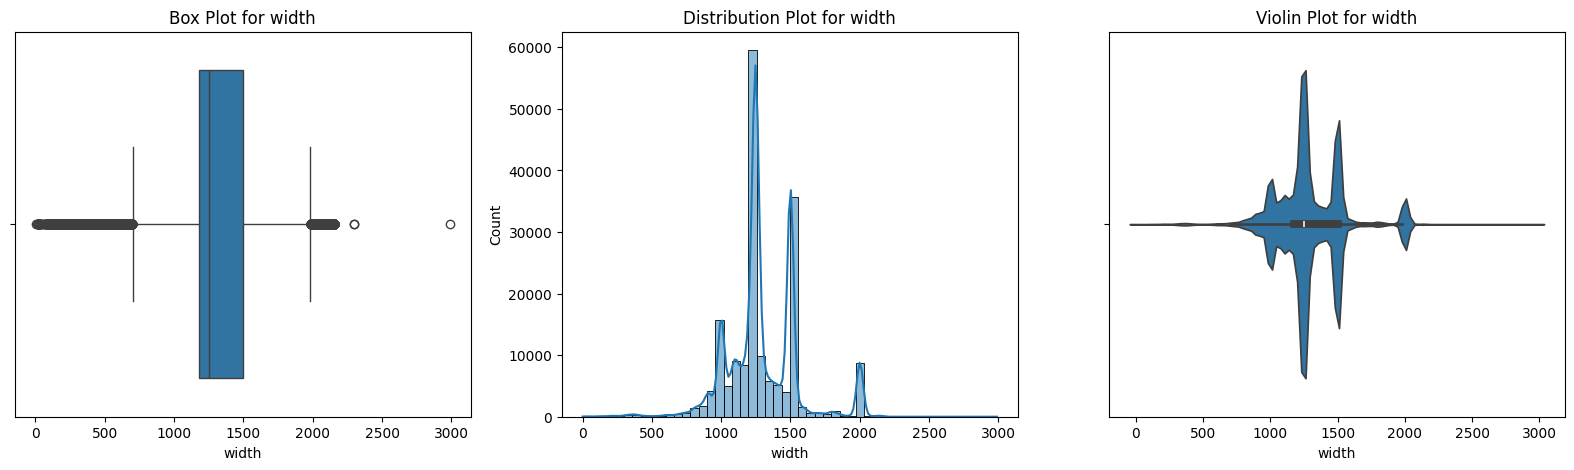

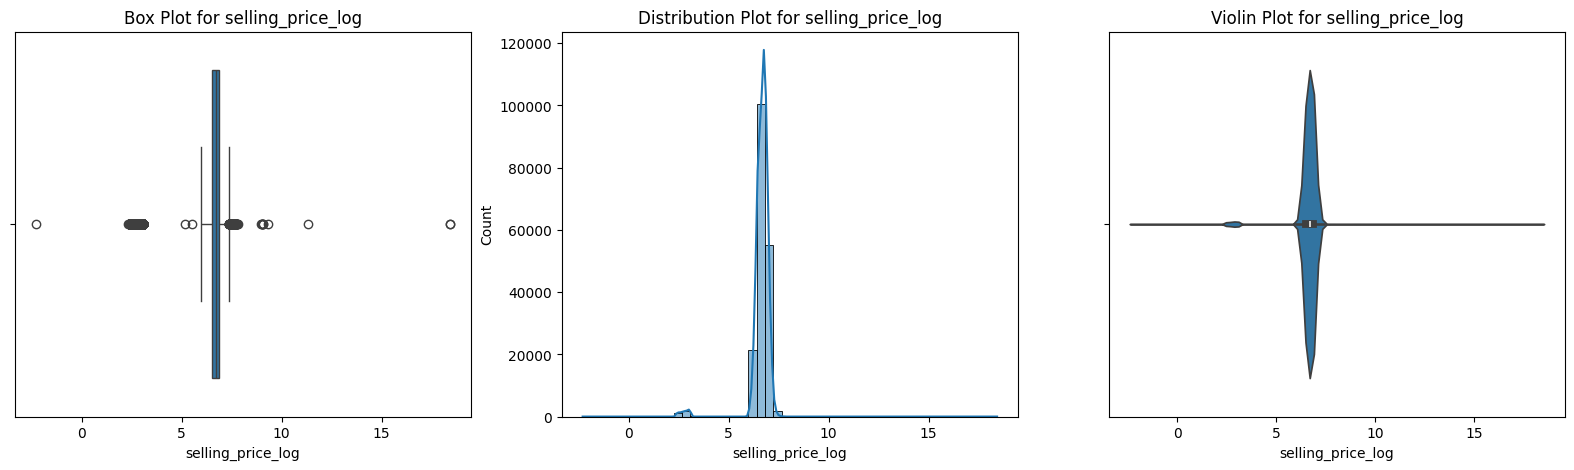

In [56]:
# after log transformation the data are normally distributed and reduced the skewness. [hist plot and violin plot]
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)

In [57]:
# Outliers Handling - Interquartile Range (IQR) method

df2 = df1.copy()
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,NaN,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,NaN,-0.162519,6.398595


In [58]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [59]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

outlier(df2, 'quantity tons_log')
outlier(df2, 'thickness_log')
outlier(df2, 'selling_price_log')
outlier(df2, 'width')
df2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,1980.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,1,5.0,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,208.086469,30200854.0,25.0,1,5.0,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,4.235594,30200854.0,25.0,1,5.0,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,NaN,30200854.0,25.0,1,5.0,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01,NaN,-0.162519,6.398595


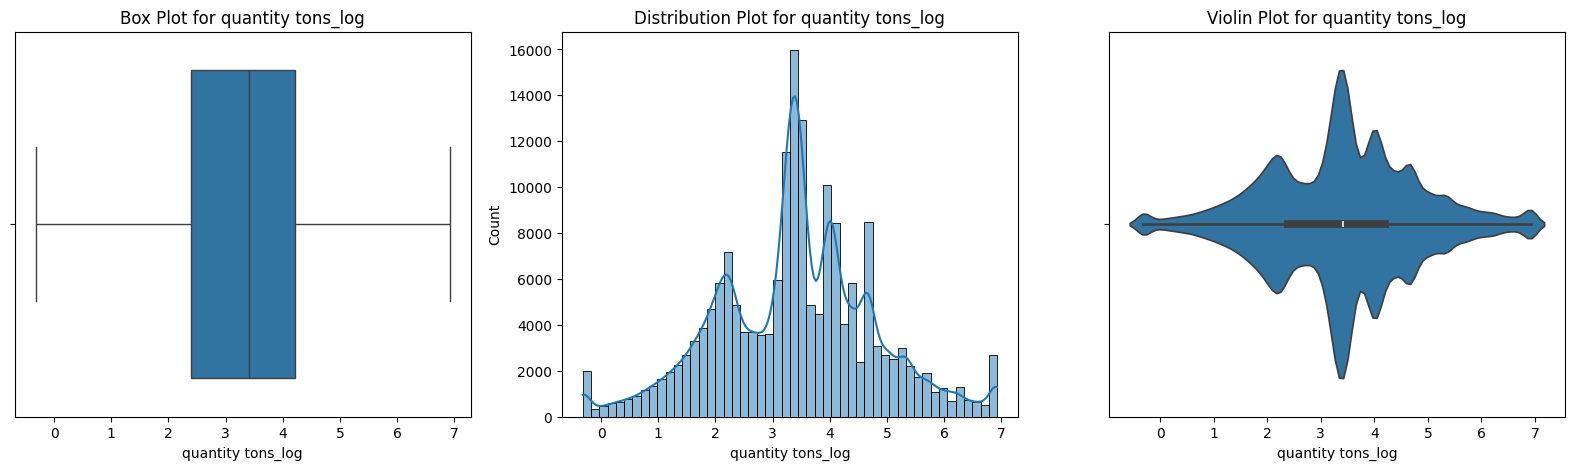

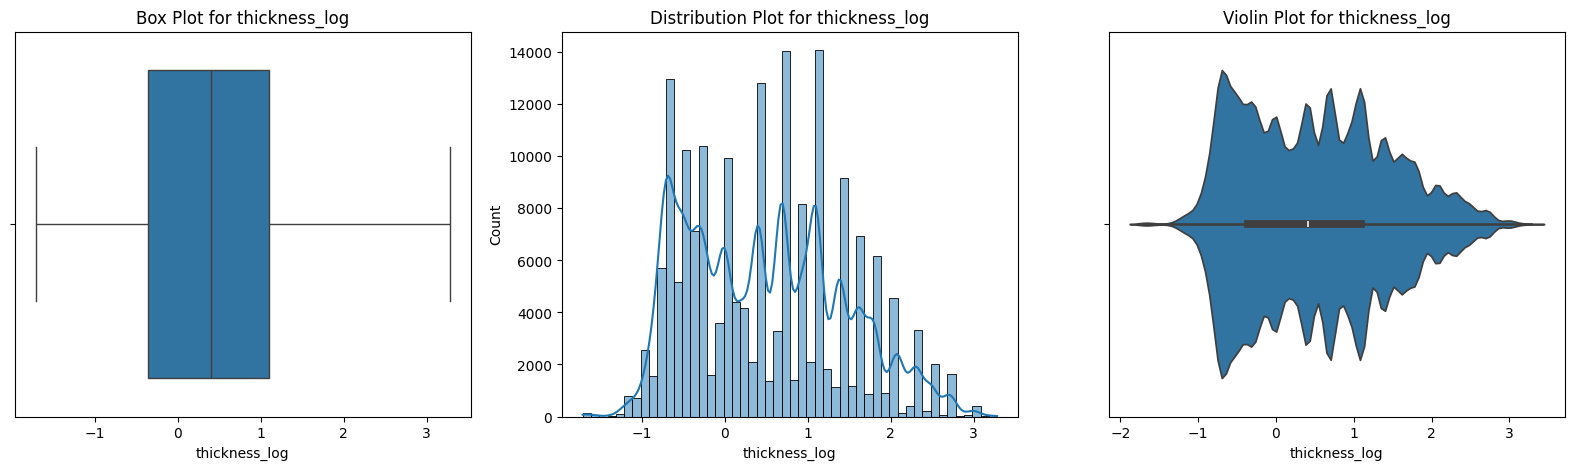

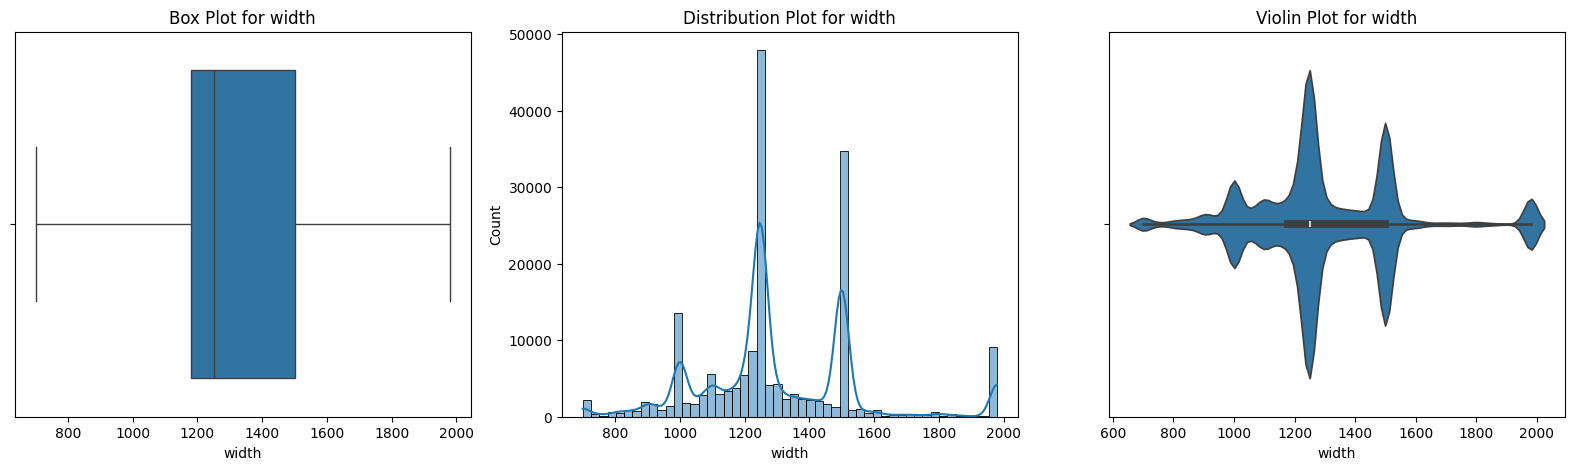

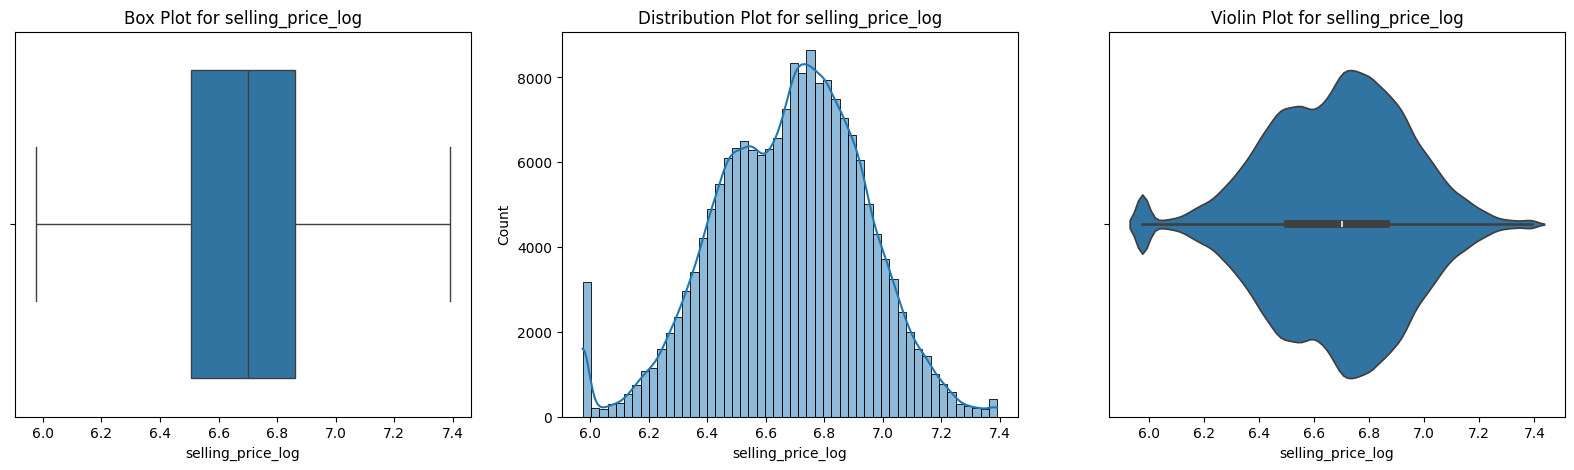

In [60]:
# transform the outliers to within range using IQR and clip() methods - box plot

for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df2, i)

In [61]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181669.0,5.875034e+03,2.349101e+06,1.000000e-05,1.097139e+01,3.036500e+01,6.716130e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,1.245800e+04,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.297046e+03,2.489619e+02,7.000000e+02,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [62]:
# after add the new column of 'quantity tons_log', 'thickness_log', 'selling_price_log', drop the existing columns
df3 = df2.drop(columns=['quantity tons', 'thickness', 'selling_price'])
df3

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,NaN,-0.162519,6.398595


In [63]:
# check the data types
df3.dtypes

item_date            float64
customer             float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery date_1       object
quantity tons_log    float64
thickness_log        float64
selling_price_log    float64
dtype: object

<Axes: >

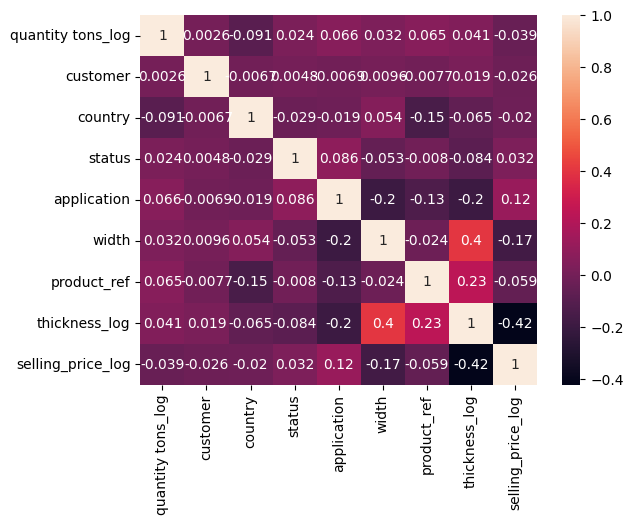

In [64]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

col = ['quantity tons_log','customer','country','status','application','width','product_ref','thickness_log','selling_price_log']
df_heatmap = df3[col].corr()
sns.heatmap(df_heatmap, annot=True)

In [65]:
# The highest value is (0.4 or -0.42) only, So there is no columns are highly correlated and no need to drop any columns.
 

In [66]:
# Wrong Delivery Date Handling

df4 = df3.copy()
df4

,item_date,customer,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery date_1,quantity tons_log,thickness_log,selling_price_log
0,20210401.0,30156308.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,0.693147,6.749931
1,20210401.0,30202938.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,-0.223144,6.953684
2,20210401.0,30153963.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,-0.967584,6.468211
3,20210401.0,30349574.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,0.832909,6.643790
4,20210401.0,30211560.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,1.386294,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,30200854.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,-0.040822,6.381816
181669,20200702.0,30200854.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,-0.051293,6.378426
181670,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,-0.342490,6.428105
181671,20200702.0,30200854.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,NaN,-0.162519,6.398595


In [67]:
# The 'delivery date' is previous date of 'item date'. so this is impossible. delivery date is always greater.
 
# find the difference between item and delivery date and add the new column of dataframe

df4['Date_difference'] = (df4['delivery date_1'] - df4['item_date_1']).dt.days
df4.head()

AttributeError: Can only use .dt accessor with datetimelike values